In [1]:
import pandas as pd
from deepface import DeepFace

In [2]:
df = pd.read_csv('../../dataset/Labeled Faces in the Wild Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,img20.jpg,img21.jpg,Yes
1,img16.jpg,img17.jpg,Yes
2,img3.jpg,img12.jpg,Yes
3,img22.jpg,img23.jpg,Yes
4,img24.jpg,img25.jpg,Yes


In [3]:
df['file_x'] = '../../dataset/Labeled Faces in the Wild Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the Wild Dataset/' + df['file_y'].astype(str)

In [4]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['../../dataset/Labeled Faces in the Wild Dataset/img20.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img21.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img16.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img17.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img3.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img12.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img22.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img23.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img24.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img25.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img1.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img2.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img1.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img4.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img1.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img

In [5]:
model_name = "OpenFace"
distance_metric = "euclidean"

In [6]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 300/300 [23:34<00:00,  4.71s/it]


In [23]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [24]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance,prediction
0,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.6591,No
1,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.8144,No
2,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.6600,No
3,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.4042,No
4,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.5965,No


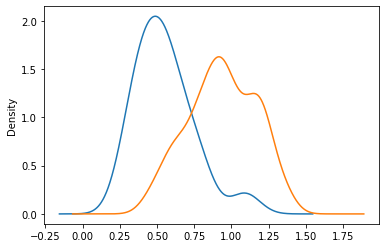

In [25]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [29]:
from chefboost import Chefboost as chef

In [30]:
config = {'algorithm': 'C4.5'}

In [31]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.4219958782196045  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  89.33333333333333 % on  300  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[6, 0], [32, 262]]
Precision:  100.0 %, Recall:  15.7895 %, F1:  27.2728 %


In [32]:
threshold = 0.374 #comes from c4.5 algorithm

In [33]:
df["prediction"] = "No"

In [34]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [35]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction
267,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.9890,No
203,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.8454,No
250,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.9365,No
194,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.6249,No
254,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,1.2114,No


In [36]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [37]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [38]:
tn, fp, fn, tp = cm.ravel()

In [39]:
tn, fp, fn, tp

(262, 0, 32, 6)

In [40]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [41]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  100.0 %
Recall:  15.789473684210526 %
F1 score  27.27272727272727 %
Accuracy:  89.33333333333333 %
